## Question 1
implement a FA function with parameters: the dataset and the desired numbers of factors. These part is a bit like the PCA function implemented in the last homework.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
def manual_fa(X, num_factors):
    # Compute the covariance matrix
    cov_mx = np.cov(X.T)

    # Compute the eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eig(cov_mx)

    # Sort the eigenvectors and eigenvalues in descending order
    sort_idx = np.argsort(eigvals)[::-1]
    eigvals = np.real(eigvals[sort_idx])
    eigvecs = np.real(eigvecs[:, sort_idx])

    # Compute the loading matrix A
    loading_matrix = eigvecs[:, :num_factors]

    # Compute the factor matrix F
    factor_matrix = np.dot(X,loading_matrix)

    # Compute the communality factor of (h_i)^2
    communality = np.sum(loading_matrix**2, axis=1)
    
    # Compute the uniqueness vector of ψ_i
    uniqueness = 1 - communality

    # Compute the vector of the proportions of total variance contributed by the ith factor
    prop_var = eigvals[:num_factors] / np.sum(eigvals)

    return loading_matrix, factor_matrix, communality, uniqueness, prop_var

In [8]:
# Just a test case.

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(X,2)
print("Loading Matrix:\n", loading_matrix)
print("\nfactor_matrix:\n", factor_matrix)
print("\ncommunality:\n", communality)
print("\nuniqueness:\n", uniqueness)
print("\nprop_va:\n", prop_va)


Loading Matrix:
 [[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]

factor_matrix:
 [[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.28967072]
 [ 2.99569623 -5.1809357 ]
 [ 3.03354506 -5.45790407]
 [ 2.94004523 -5.69467143]
 [ 2.86283042 -5.63899256]
 [ 2.87037575 -5.12999135]
 [ 2.91496666 -5.12263409]
 [ 3.09243264 -5.737

### question b
On the AutoMPG dataset, compare with the PCA results in HW05.

In [10]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/autompg.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
autompg_variables = df.drop(['mpg','car name'], axis=1)
autompg_mpg = df['mpg']
autompg_variables = pd.DataFrame(autompg_variables, dtype=float)

loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(autompg_variables, 2)
print("Loading Matrix:\n", loading_matrix)
print("\nfactor_matrix:\n", factor_matrix)
print("\ncommunality:\n", communality)
print("\nuniqueness:\n", uniqueness)
print("\nprop_va:\n", prop_va)

Loading Matrix:
 [[ 1.79262233e-03 -1.33244815e-02]
 [ 1.14341275e-01 -9.45778439e-01]
 [ 3.89670355e-02 -2.98248416e-01]
 [ 9.92673415e-01  1.20752748e-01]
 [-1.35283460e-03  3.48258394e-02]
 [-1.33684138e-03  2.38516836e-02]
 [-5.51538021e-04  3.24298106e-03]]

factor_matrix:
 [[3518.40010719   95.97553085]
 [3712.29658003   67.67321996]
 [3452.93676257   71.36098697]
 [3448.35661164   84.27445271]
 [3463.62306262   91.02829896]
 [4365.86985482   61.3100678 ]
 [4382.4917687    32.63910157]
 [4339.00454868   42.28221344]
 [4453.27940475   38.81035204]
 [3873.69819151   41.239576  ]
 [3587.21916265   19.22119334]
 [3627.5785002    68.35712512]
 [3784.93363611   32.99955947]
 [3124.08970266 -122.87757815]
 [2371.13541624  153.36739271]
 [2838.48088064  128.62752043]
 [2780.10542452  119.960833  ]
 [2594.12155643  100.03068451]
 [2128.80689669  141.34800859]
 [1834.32405843  118.45809332]
 [2668.27984995  194.9003615 ]
 [2427.83081942  167.51630893]
 [2373.08153446  162.32547852]
 [2235.

We can see that the structure of two model are different. The FA use X=FA, and the PCA use Z=XV.

## Question 2: 
Transpose the ORL face dataset to be a data matrix of 2576x400. Perform the factore matrix. We take n=400 and see how many variables are needed to get the desired explanation.

In [12]:
from PIL import Image

def edge(datas):
    criteria = []
    element = 0
    for i, nums in enumerate(datas):
        element += nums
        if element >= 0.5 and len(criteria) == 0:
            criteria.append(i+1)
        if element >= 0.6 and len(criteria) == 1:
            criteria.append(i+1)
        if element >= 0.7 and len(criteria) == 2:
            criteria.append(i+1)
        if element >= 0.8 and len(criteria) == 3:
            criteria.append(i+1)
        if element >= 0.9 and len(criteria) == 4:
            criteria.append(i+1)
            break
    return criteria

ORLface_data = []
for i in range(1, 41):
    for j in range(1,11):
        image_dir = f"/content/drive/MyDrive/DA/ORL Faces/{i}_{j}.png"
        img = Image.open(image_dir)
        img_array = np.asarray(img)
        ORLface_data.append(img_array.flatten())
ORLface_data = np.array(ORLface_data)

loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(ORLface_data, 400)
print("Loading Matrix:\n", loading_matrix)
print("\nfactor_matrix:\n", factor_matrix)
print("\ncommunality:\n", communality)
print("\nuniqueness:\n", uniqueness)
print("\nprop_va:\n", prop_va)

criteria = edge(prop_va)
print("50% explanable:", criteria[0], " principal components")
print("60% explanable:", criteria[1], " principal components")
print("70% explanable:", criteria[2], " principal components")
print("80% explanable:", criteria[3], " principal components")
print("90% explanable:", criteria[4], " principal components")

Loading Matrix:
 [[ 4.18418191e-03  2.92082392e-02  3.98717037e-02 ...  1.08463577e-02
  -3.88942168e-03 -2.43641364e-03]
 [ 4.34579327e-03  2.92119864e-02  3.97740019e-02 ...  9.40164343e-03
  -1.01740124e-03 -2.45015920e-03]
 [ 3.69863744e-03  2.93623995e-02  4.00714546e-02 ...  1.27420187e-02
   4.05565911e-03  5.34254516e-03]
 ...
 [ 1.53271003e-02 -1.27914953e-02  2.41267237e-02 ... -3.11265398e-02
  -2.33792628e-02 -2.19128626e-06]
 [ 1.33515940e-02 -1.78069997e-02  2.89114944e-02 ... -1.43982079e-03
  -4.05094260e-03  2.61679055e-03]
 [ 1.38193377e-02 -1.75111834e-02  3.08289732e-02 ... -2.35419739e-03
  -4.65625113e-02 -7.79406816e-03]]

factor_matrix:
 [[-3735.25330174  3663.54695712   761.4230817  ...   -15.44696504
     32.79484107    10.95171292]
 [-4020.91757202  3539.56387202   398.21358833 ...   -14.493715
     28.63463334    10.95171292]
 [-4201.5410653   2920.14627233   298.77109127 ...    -8.79447361
     31.76165768    10.95171292]
 ...
 [-4339.84011576  3889.9586488

* 50% explanable: 5  principal components
* 60% explanable: 9  principal components
* 70% explanable: 16  principal components
* 80% explanable: 32  principal components
* 90% explanable: 76  principal components
* If we want to plot an image with 80% explaining of the total variance, we take n=32.

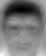

In [13]:
loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(ORLface_data, 32)


first_PC = loading_matrix[:, 0]

min_value = np.min(first_PC)
max_value = np.max(first_PC)
scaled_pc = (first_PC - min_value) * (255 / (max_value - min_value))

scaled_pc_2D = scaled_pc.reshape(56,46)
img = Image.fromarray(scaled_pc_2D.astype('uint8'))
img.save('r.png', 'PNG')
img.show()

## Question 3
### a
find a oackage to perform PLSR on the AutoMPG dataset. Take 300 cars randomly to build the model and the rest 92 cars to test.
In PLSR, we can see the relationship of multiple x and multiple y altogether, and see if the relashionship are strong and give us high R^2 score.

In [20]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/autompg.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
data = pd.DataFrame(df)

# Split data into training and testing sets
train, test = train_test_split(data, test_size=92)
X_train = train.drop(['mpg', 'car name'], axis=1)
y_train = train['mpg']
X_test = test.drop(['mpg', 'car name'], axis=1)
y_test = test['mpg']

# Fit PLSR model
plsr = PLSRegression(n_components=2)
plsr.fit(X_train, y_train)

# Predict on test set
y_pred = plsr.predict(X_test)
# print(y_pred)
# Print R^2 score
score = plsr.score(X_test, y_test)
print(f'R^2 score: {score:.3f}')


R^2 score: 0.792


We can see that the R^2 is 0.792, which is really a nice number! However, if we take the model year as a part of y, things will be different.

In [21]:
# Split data into training and testing sets
train, test = train_test_split(data, test_size=92, random_state=42)
X_train = train.drop(['mpg', 'car name', 'model year'], axis=1)
y_train = train[['mpg', 'model year']]
X_test = test.drop(['mpg', 'car name', 'model year'], axis=1)
y_test = test[['mpg', 'model year']]

# Fit PLSR model
plsr = PLSRegression(n_components=2)
plsr.fit(X_train, y_train)

# Predict on test set
y_pred = plsr.predict(X_test)
# print(y_pred)
# Print R^2 score
score = plsr.score(X_test, y_test)
print(f'R^2 score: {score:.3f}')


R^2 score: 0.355


We can see the R^2 score drop dramatically. In my opinion, the model year shouldn't be in the dependent part, since it makes the result worse.